In [1]:
import pandas as pd
import numpy as np
import re
import os
import matplotlib as plt
import time
%matplotlib inline
work_dir='D:\\002.Learning\\Yelp_Data_Challenge\\Yelp_Dataset_Round7\\'

### 2.0 Content

In [2]:
# 2.1 Columns Exploraton and Aanlysis
# 2.2 Country and State Analysis
# 2.3 Business Category Analysis
# 2.4 Select Restarunt Business and Only US
# 2.5 Save the file
#     Yelp_us_food.csv    25756    business totally
#     Yelp_us_food_review 1428256  review totally

### 2.1 Columns Exploraton and Aanlysis

In [3]:
Yelp_biz=pd.read_csv(work_dir+'yelp_academic_dataset_business.csv', index_col=False)

C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (1,4,7,17,29,49,60,62,79,86,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Column Names Description, generate Key_Columns for future usage
print 'Non \'Attributes\'Columns:\n'
Key_Columns=[]
for item in Yelp_biz.columns:
    if ('attributes' not in item) & ('hours' not in item): 
        Key_Columns.append(item)
        print item
print '--------------------------------'
print '\'Hours\' Columns:\n'
for item in Yelp_biz.columns:
    if 'hours' in item : 
        print item
print '--------------------------------'

print '\'Attributes\'Columns:\n'
for item in Yelp_biz.columns:
    if 'attributes' in item: 
        print item        
print '--------------------------------'
print Key_Columns

Non 'Attributes'Columns:

business_id
categories
name
review_count
state
full_address
open
city
stars
type
latitude
longitude
neighborhoods
--------------------------------
'Hours' Columns:

hours.Thursday.open
hours.Friday.open
hours.Tuesday.open
hours.Monday.open
hours.Friday.close
hours.Thursday.close
hours.Saturday.open
hours.Wednesday.close
hours.Monday.close
hours.Tuesday.close
hours.Saturday.close
hours.Sunday.open
hours.Sunday.close
hours.Wednesday.open
--------------------------------
'Attributes'Columns:

attributes.Ambience.divey
attributes.Dietary Restrictions.vegan
attributes.Happy Hour
attributes.Order at Counter
attributes.Hair Types Specialized In.africanamerican
attributes.Hair Types Specialized In.kids
attributes.BYOB
attributes.Good For.latenight
attributes.Outdoor Seating
attributes.Alcohol
attributes.Ambience.classy
attributes.By Appointment Only
attributes.Parking.lot
attributes.Ambience.touristy
attributes.Corkage
attributes.Good For.brunch
attributes.Waiter Serv

### 2.2 Country and State Analysis

In [5]:
us_state_list_text="""
Alabama	AL
Alaska	AK
Arizona	AZ
Arkansas	AR
California	CA
Colorado	CO
Connecticut	CT
Delaware	DE
Florida	FL
Georgia	GA
Hawaii	HI
Idaho	ID
Illinois	IL
Indiana	IN
Iowa	IA
Kansas	KS
Kentucky	KY
Louisiana	LA
Maine	ME
Maryland	MD
Massachusetts	MA
Michigan	MI
Minnesota	MN
Mississippi	MS
Missouri	MO
Montana	MT
Nebraska	NE
Nevada	NV
New Hampshire	NH
New Jersey	NJ
New Mexico	NM
New York	NY
North Carolina	NC
North Dakota	ND
Ohio	OH
Oklahoma	OK
Oregon	OR
Pennsylvania	PA
Rhode Island	RI
South Carolina	SC
South Dakota	SD
Tennessee	TN
Texas	TX
Utah	UT
Vermont	VT
Virginia	VA
Washington	WA
West Virginia	WV
Wisconsin	WI
Wyoming	WY"""


us_state_list=[i.split('\t')[1] for i in us_state_list_text.split('\n')[1:]]

In [6]:
State_City_Summary=Yelp_biz.groupby(['state','city']).agg({'business_id':['count']})
State_City_Summary['country'] = State_City_Summary.index.map(lambda (x,y): 'US' if x in us_state_list else 'WORLD')
State_City_Summary['state']= State_City_Summary.index.map(lambda (x,y): x)
State_City_Summary['business_count']=State_City_Summary[('business_id','count')]

In [7]:
#business count about the country
country_summary=State_City_Summary.groupby(['country']).agg({('business_id', 'count'):['sum']})
country_summary.columns= country_summary.columns.droplevel().droplevel()
country_summary

sum
country       
US       67584
WORLD     9858

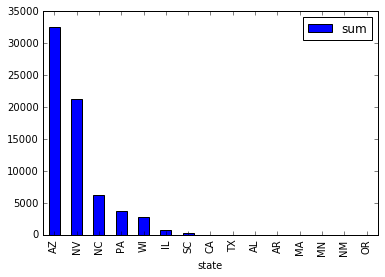

In [8]:
#business count about the country
state_summary=State_City_Summary[State_City_Summary['country']=='US'].groupby(['state']).agg({('business_id', 'count'):['sum']})
state_summary.columns= state_summary.columns.droplevel().droplevel()
state_summary.sort_values(by=['sum'], ascending=False).plot(kind='bar')

### 2.3 Business Category Analysis

In [9]:
#Idea: 
#2.3.1 put all the category label together and rank by the frequency 
#2.3.2 Use the most frequent labels to relabel the business again. 
#2.3.3.In the end 21 Labels can be obtained
#It can be found that 'Restaurants' and 'Food' could cover all the reasturant business

In [10]:
#2.3.1 put all the category label together and rank by the frequency 

#Generate combined list
Categories_Collection=[]
for i in range(len(Yelp_biz)):
    catg=Yelp_biz.iloc[i]['categories'].strip('[]')
    catg_list=catg.split(',')
    for j in range(len(catg_list)):
        Categories_Collection.append(catg_list[j].strip(' \''))
catg_freq=pd.DataFrame(Categories_Collection, columns=['catg'])['catg'].value_counts().sort_values(ascending=False)
catg_freq=catg_freq.to_frame(name='count')
catg_freq.reset_index(inplace=True)
catg_freq=catg_freq.rename(columns={"index": "catg"})
#Delete the category value of NULL
catg_freq=catg_freq[catg_freq['catg'].apply(lambda x: True if x<>'' else False)].reset_index(drop=True)

In [11]:
#2.3.2 Use the most frequent labels to relabel the business again. 

# 1. label the catg 1
# 2. output the number
# 2. label in catg 2 in rest of

start_time=time.time()

Yelp_categories=pd.DataFrame(Yelp_biz['categories'], columns=['categories', 'Match']) #atch as NULL 

for i in range(len(Yelp_categories)):
    for j in range(300):
        if pd.notnull(Yelp_categories.iloc[i]['Match']):
            break
        if catg_freq.iloc[j]['catg'] in Yelp_categories.iloc[i]['categories']:
            Yelp_categories.iloc[i]['Match']=catg_freq.iloc[j]['catg']
            
Yelp_categories[Yelp_categories['Match'].apply(lambda x: pd.isnull(x))]    

end_time=time.time()

print "%s seconds" % (end_time-start_time)
            

135.934000015 seconds


In [12]:
Category_Summary_Final=pd.DataFrame(Yelp_categories['Match'], columns=['Match'])['Match'].value_counts().sort_values(ascending=False)
#print len(Yelp_categories[Yelp_categories['Match'].apply(lambda x: pd.isnull(x))])

In [13]:
#2.3.3.In the end 21 Labels can be obtained

Category_Summary_Final=Category_Summary_Final.to_frame(name='count')
Category_Summary_Final.reset_index(inplace=True)
Category_Summary_Final=Category_Summary_Final.rename(columns={"index": "catg"})
Category_Summary_Final

catg  count
0                    Restaurants  25071
1                       Shopping  11206
2                           Food   6453
3                  Beauty & Spas   5827
4                  Home Services   4464
5               Health & Medical   4362
6                     Automotive   3838
7                    Active Life   2680
8                 Local Services   2658
9                      Nightlife   2396
10     Event Planning & Services   2281
11                          Pets   1452
12          Arts & Entertainment   1114
13               Hotels & Travel    919
14            Financial Services    684
15         Professional Services    513
16                     Education    435
17  Public Services & Government    380
18       Religious Organizations    211
19                  Local Flavor    125
20                    Mass Media     96
21                   Real Estate     20

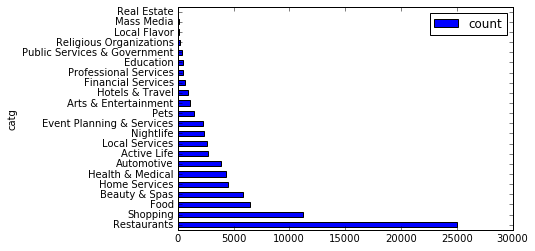

In [14]:
Category_Summary_Final.plot(kind='barh',x='catg', y='count')

### 2.4 Select Restarunt Business and Only US

In [15]:
#2.4.1 Get the US food population
#2.4.2 Get the review for US food

In [16]:
#2.4.1 Get the US food population
Yelp_us_food=Yelp_biz[(Yelp_biz['state'].apply(lambda x: True if str(x) in us_state_list_text else False)) \
                      & (Yelp_biz['categories'].apply(lambda x: True if 'Restaurants' in x or 'Food' in x else False))]

In [17]:
#Review counts
Yelp_us_food['review_count'].describe(percentiles=[.05,.10,.25,.50,.75,.90,.95])

count    25756.000000
mean        60.434850
std        144.439169
min          3.000000
5%           3.000000
10%          4.000000
25%          8.000000
50%         20.000000
75%         60.000000
90%        145.000000
95%        235.000000
max       5642.000000
Name: review_count, dtype: float64

In [18]:
Yelp_us_food.groupby(['state']).agg({'business_id':['count'],
                                      'review_count': ['sum']}).sort_values([('business_id','count')],ascending=False)
#After checking the reviews in TX, I found that majority of reviews is actually for Las Vegas Texas De Baszil

review_count business_id
               sum       count
state                         
AZ          623193       11514
NV          672784        7289
NC          110831        2922
PA           80500        2067
WI           51066        1405
IL           13844         387
SC            3319         167
TX            1002           2
AL               4           1
MA               3           1
NM              14           1

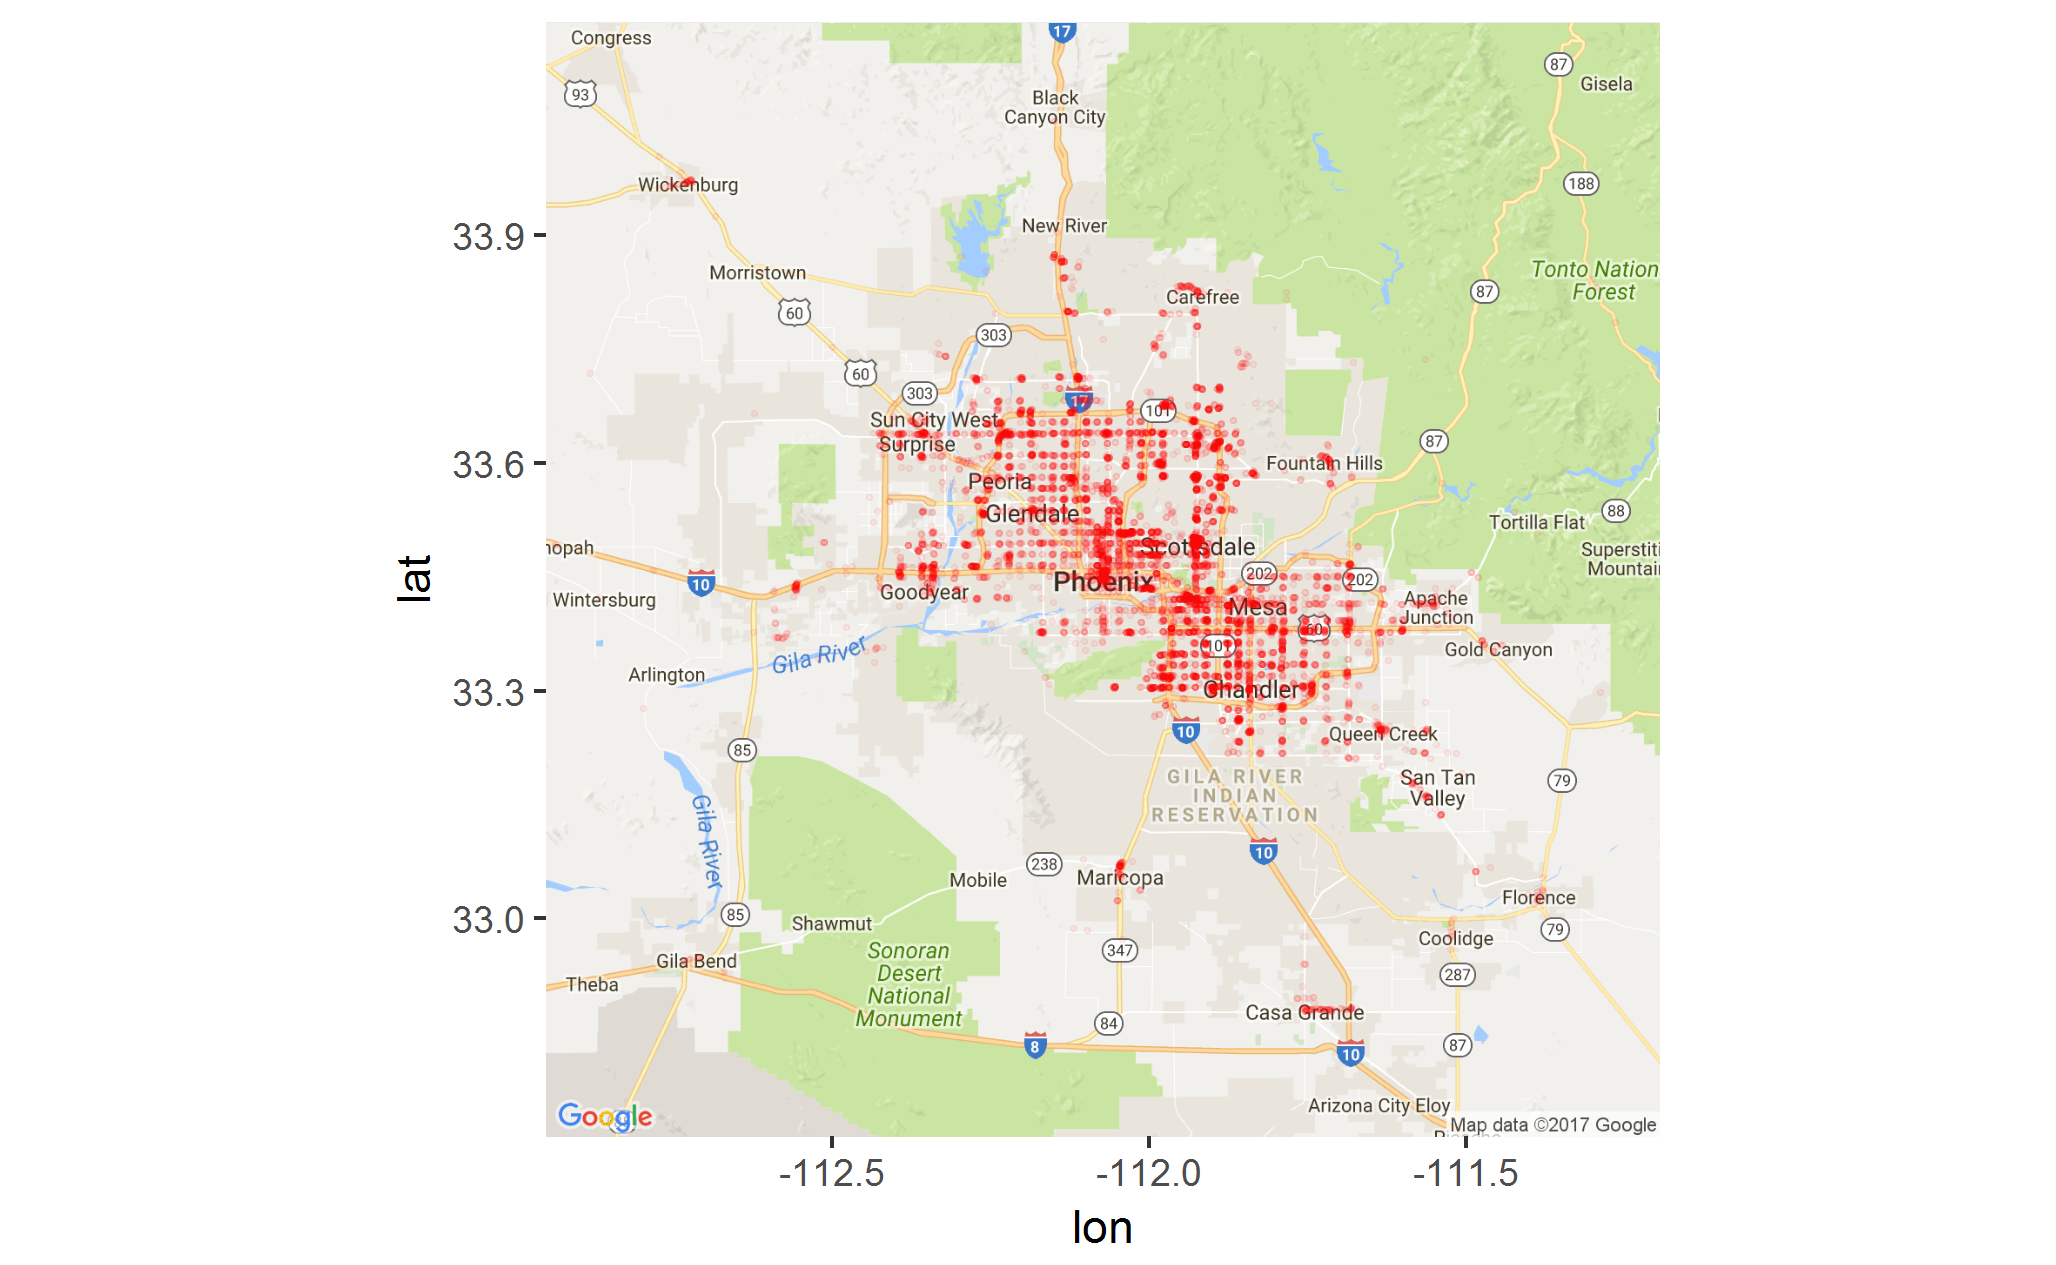

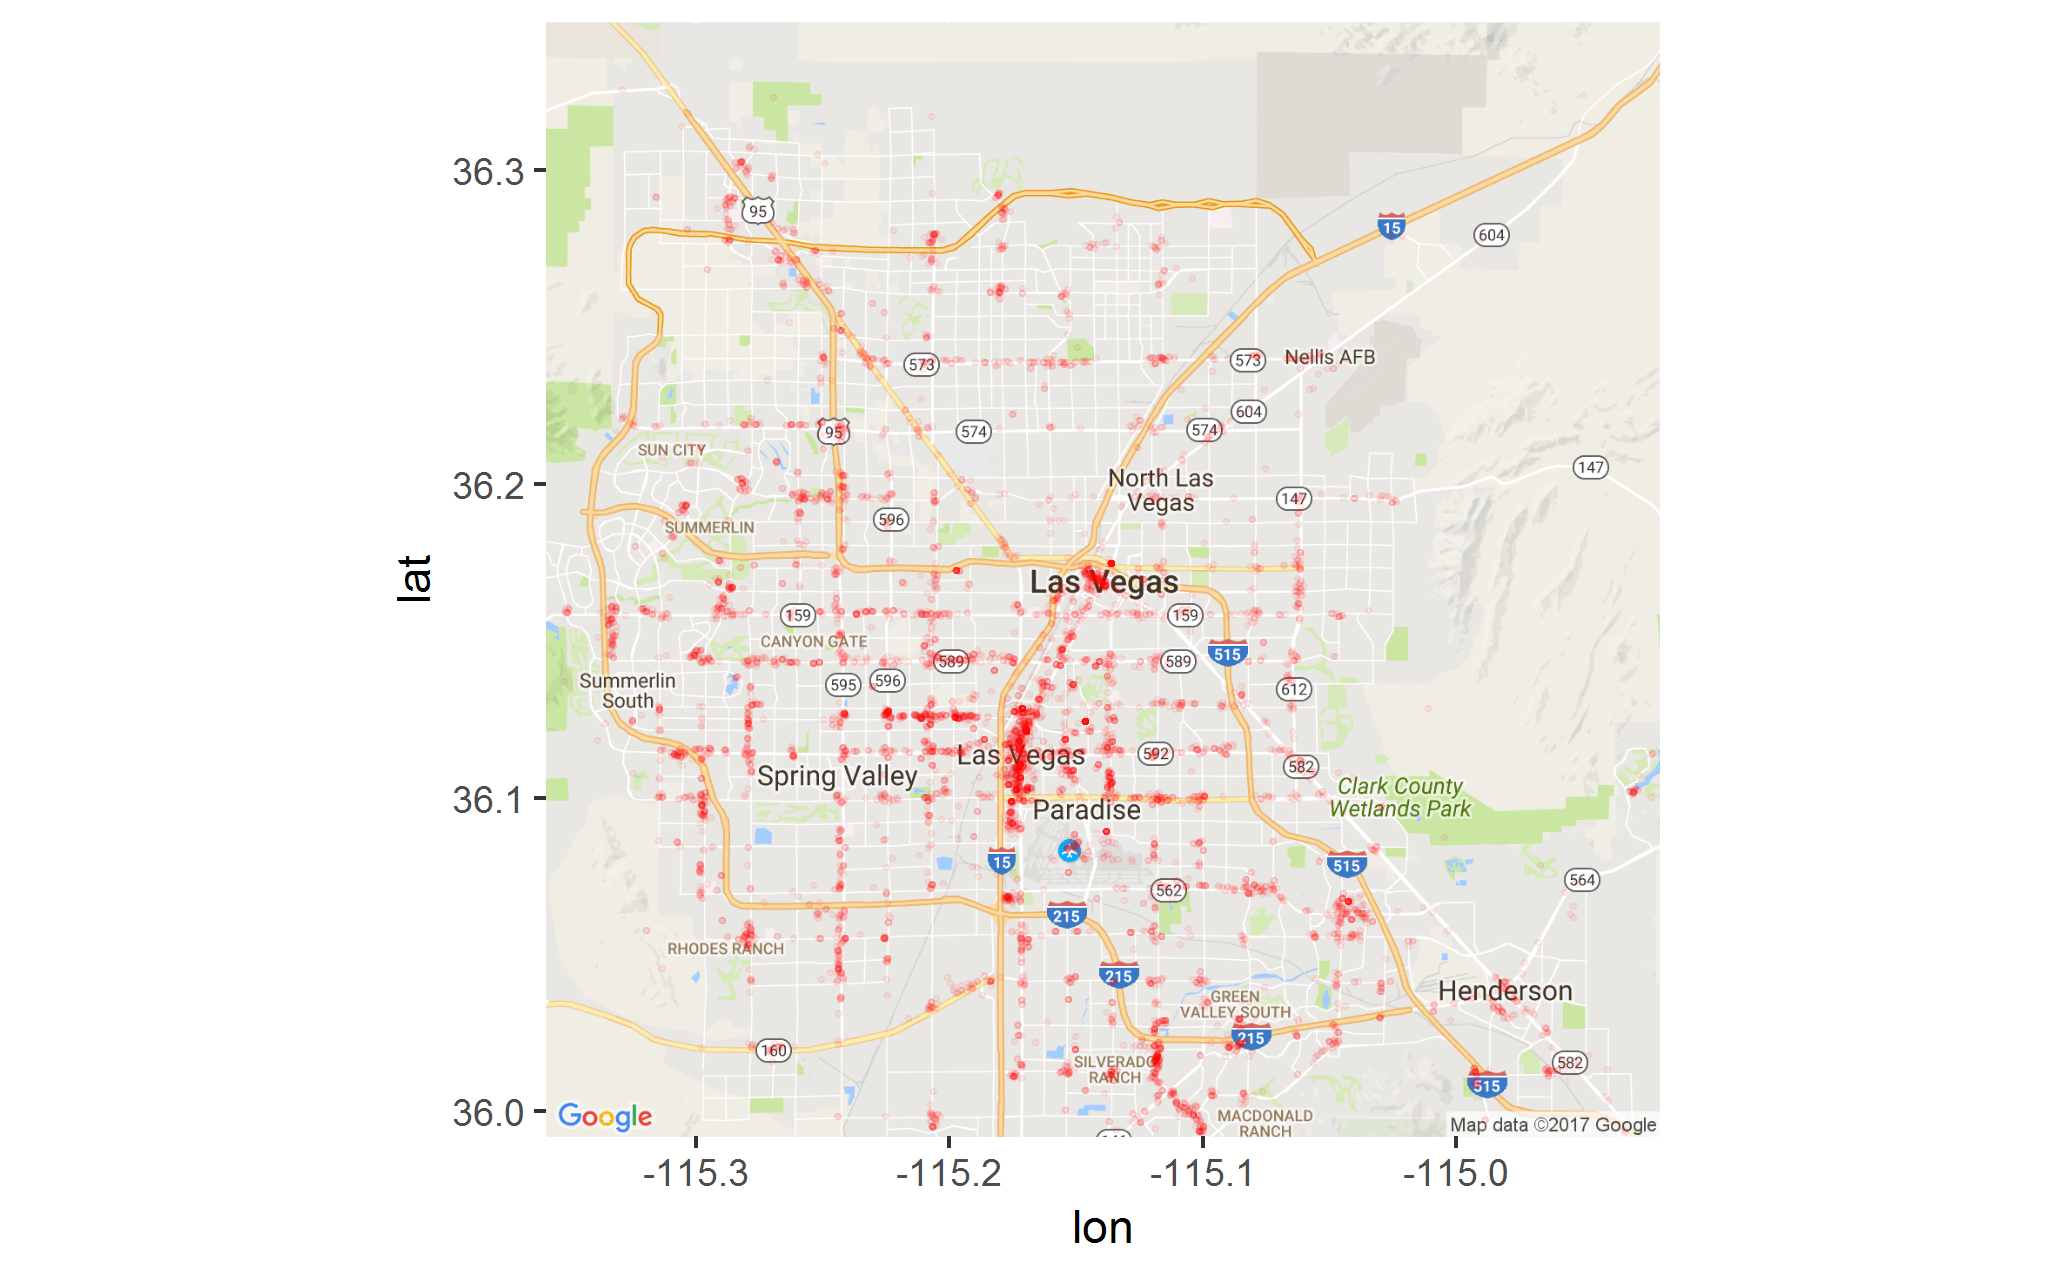

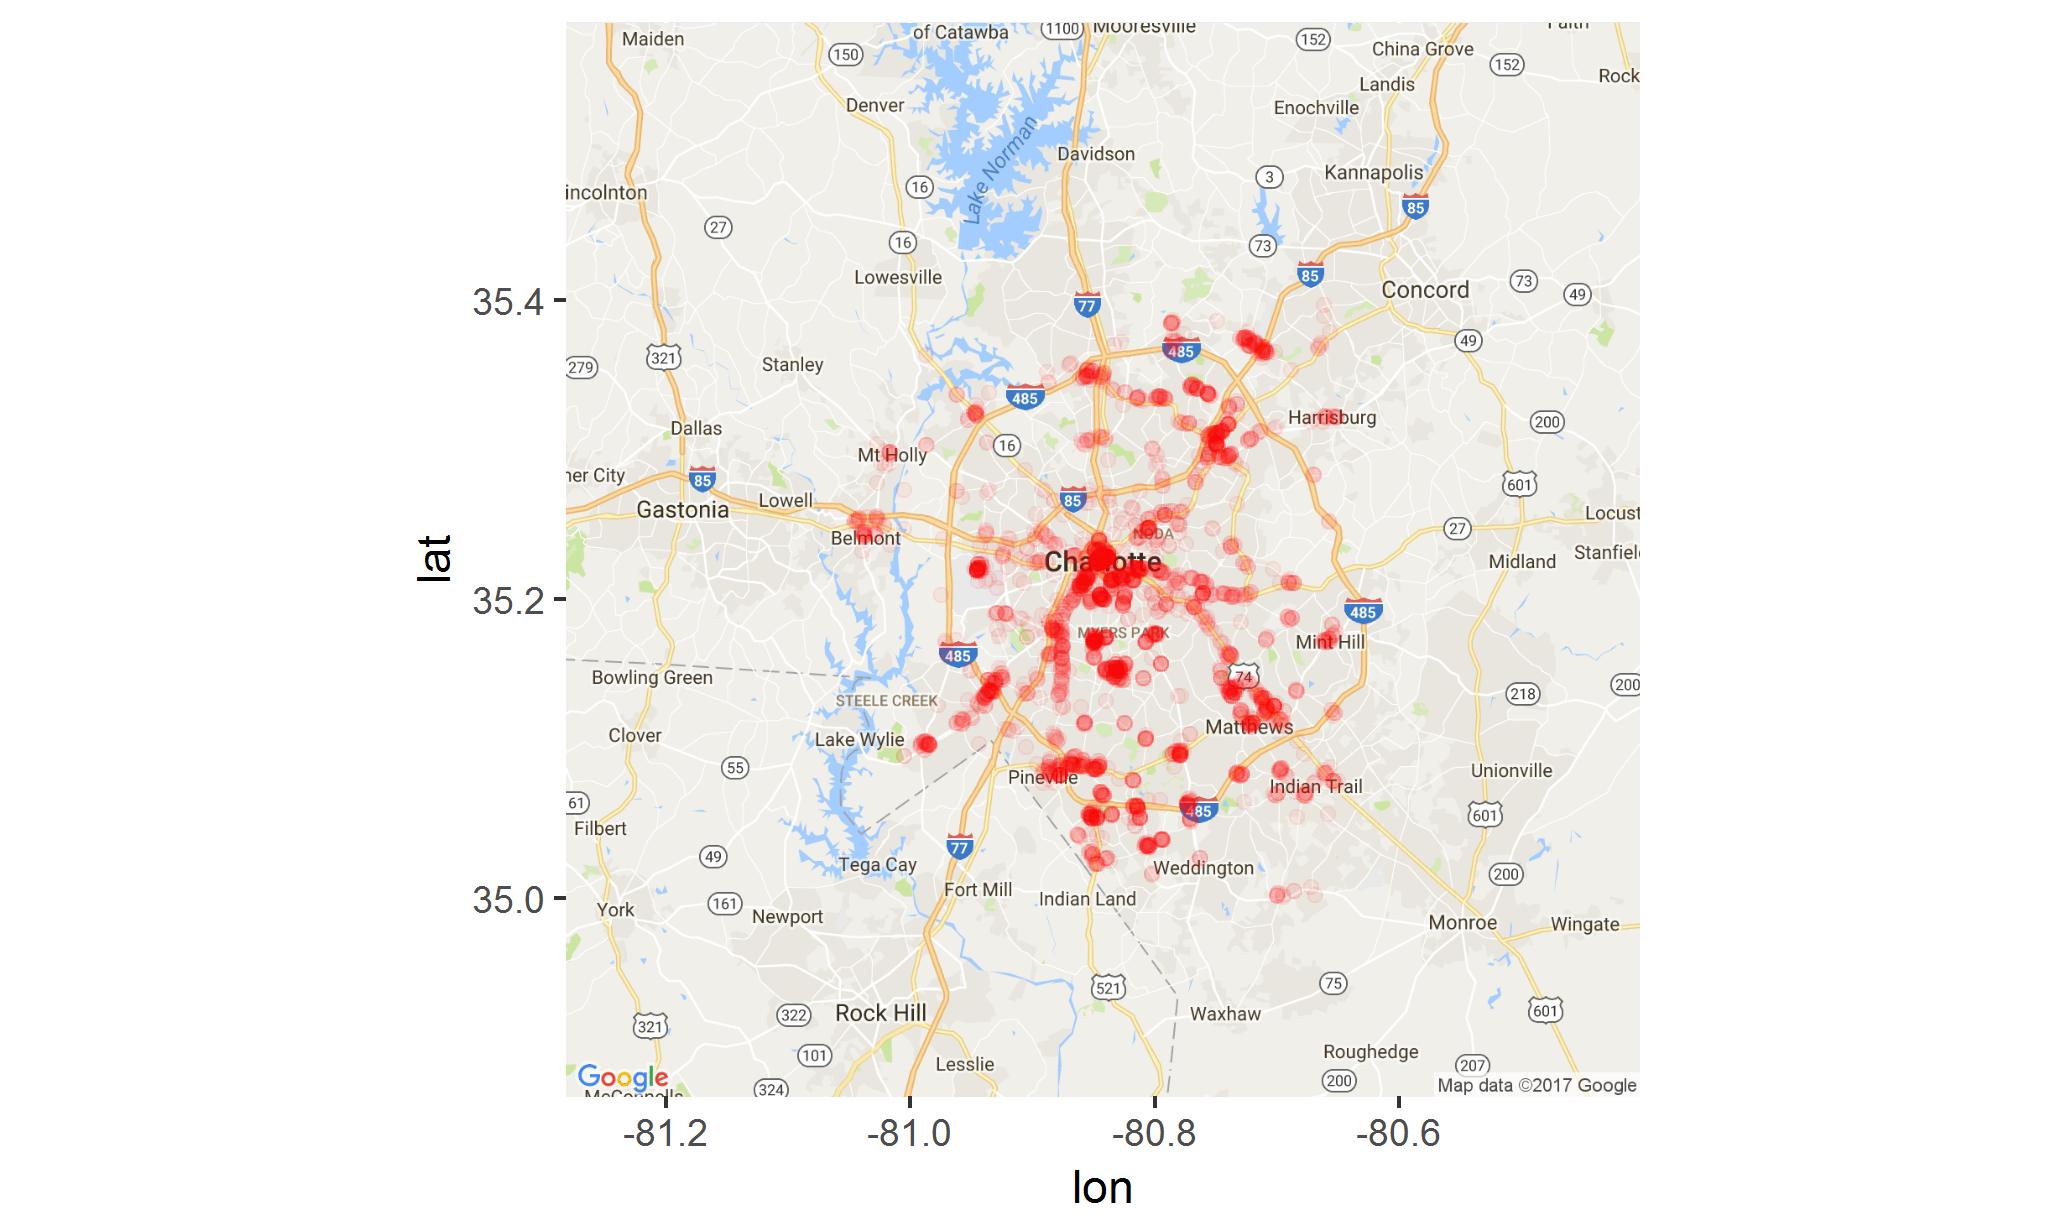

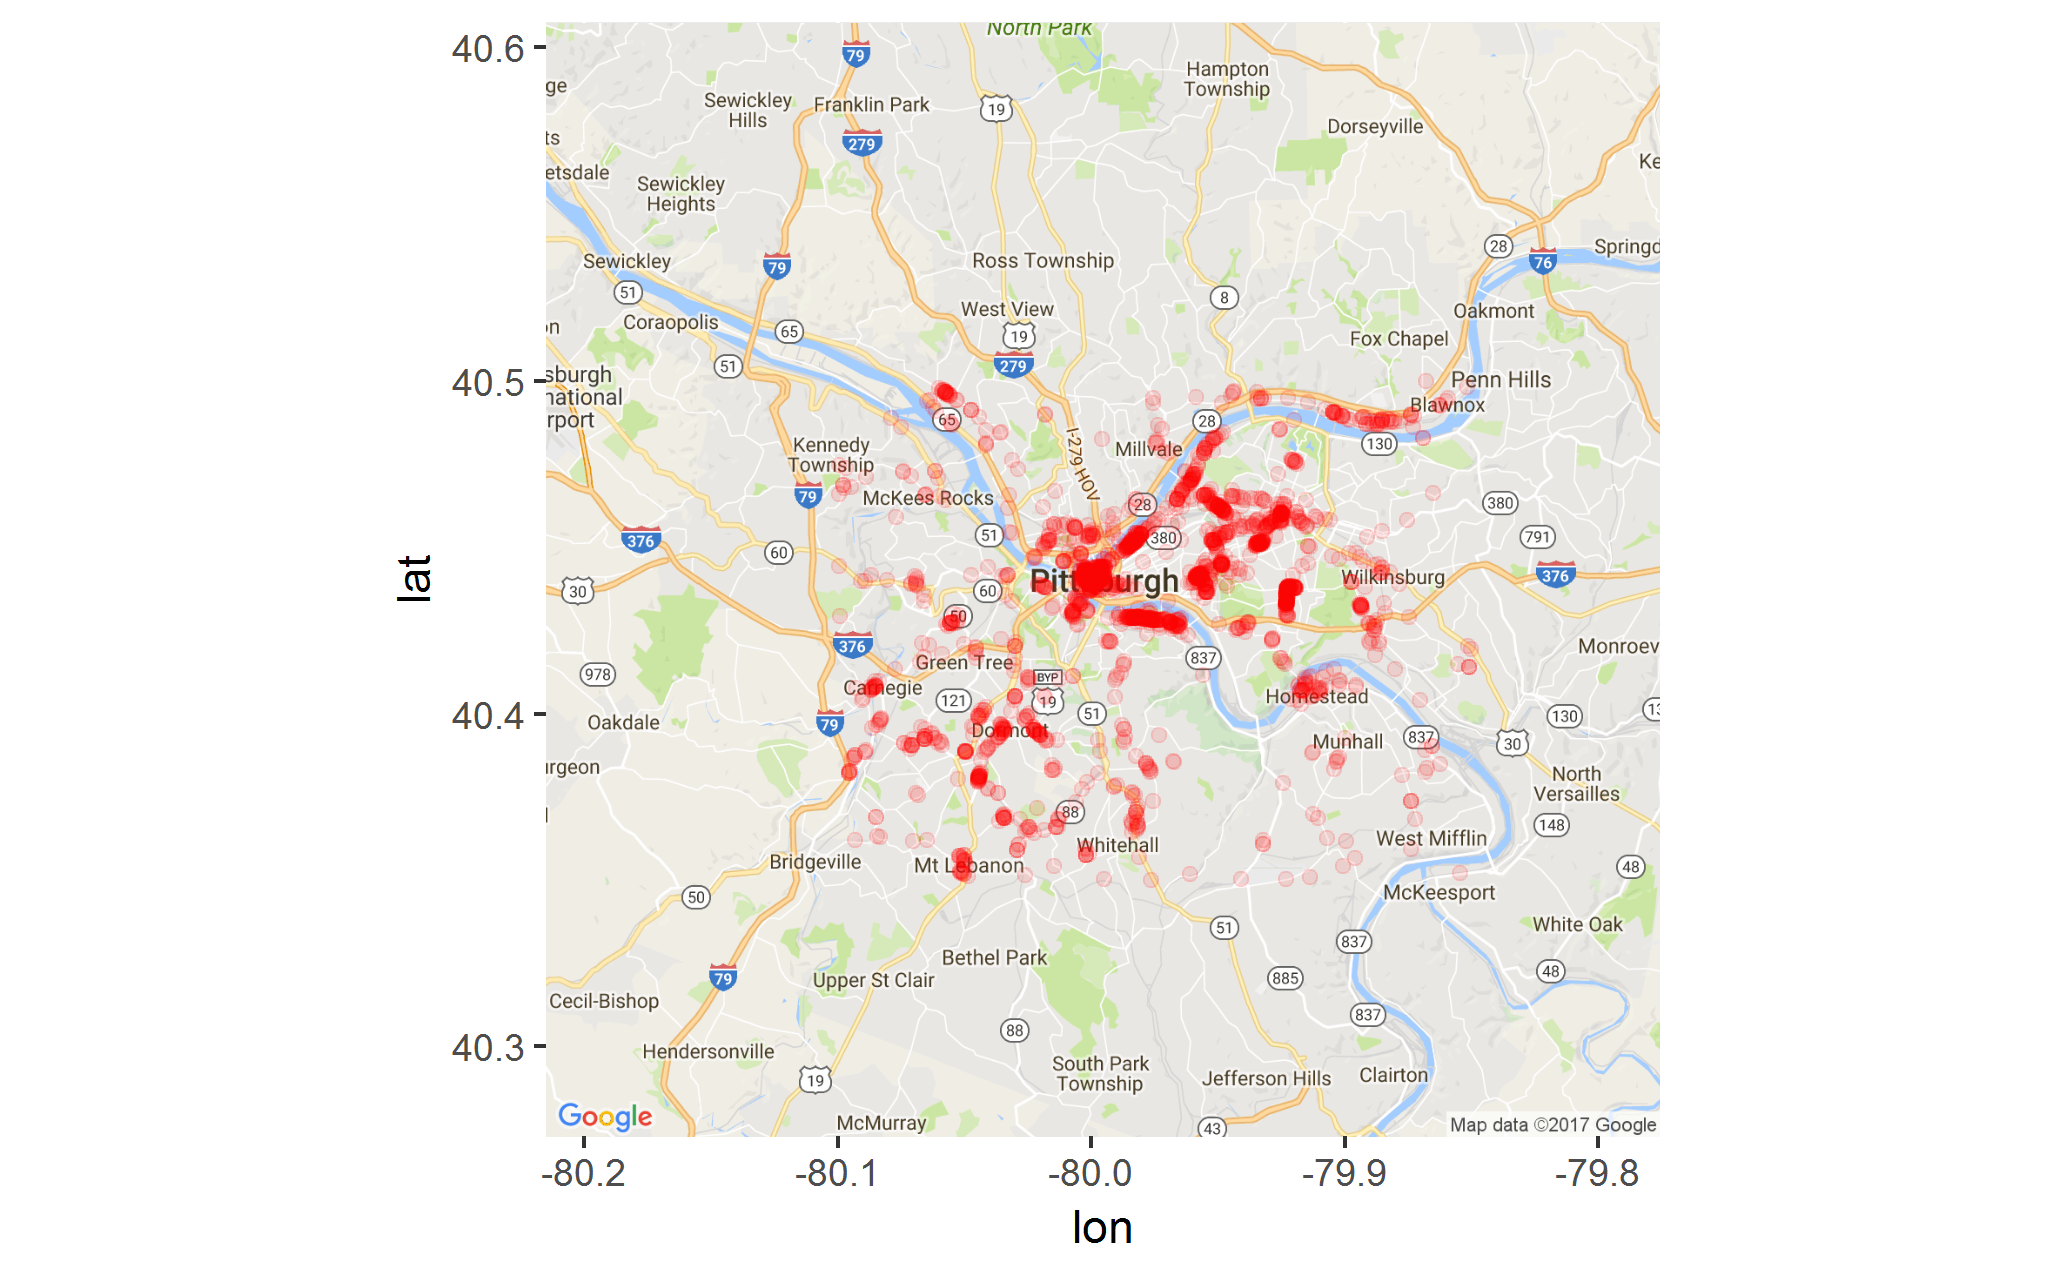

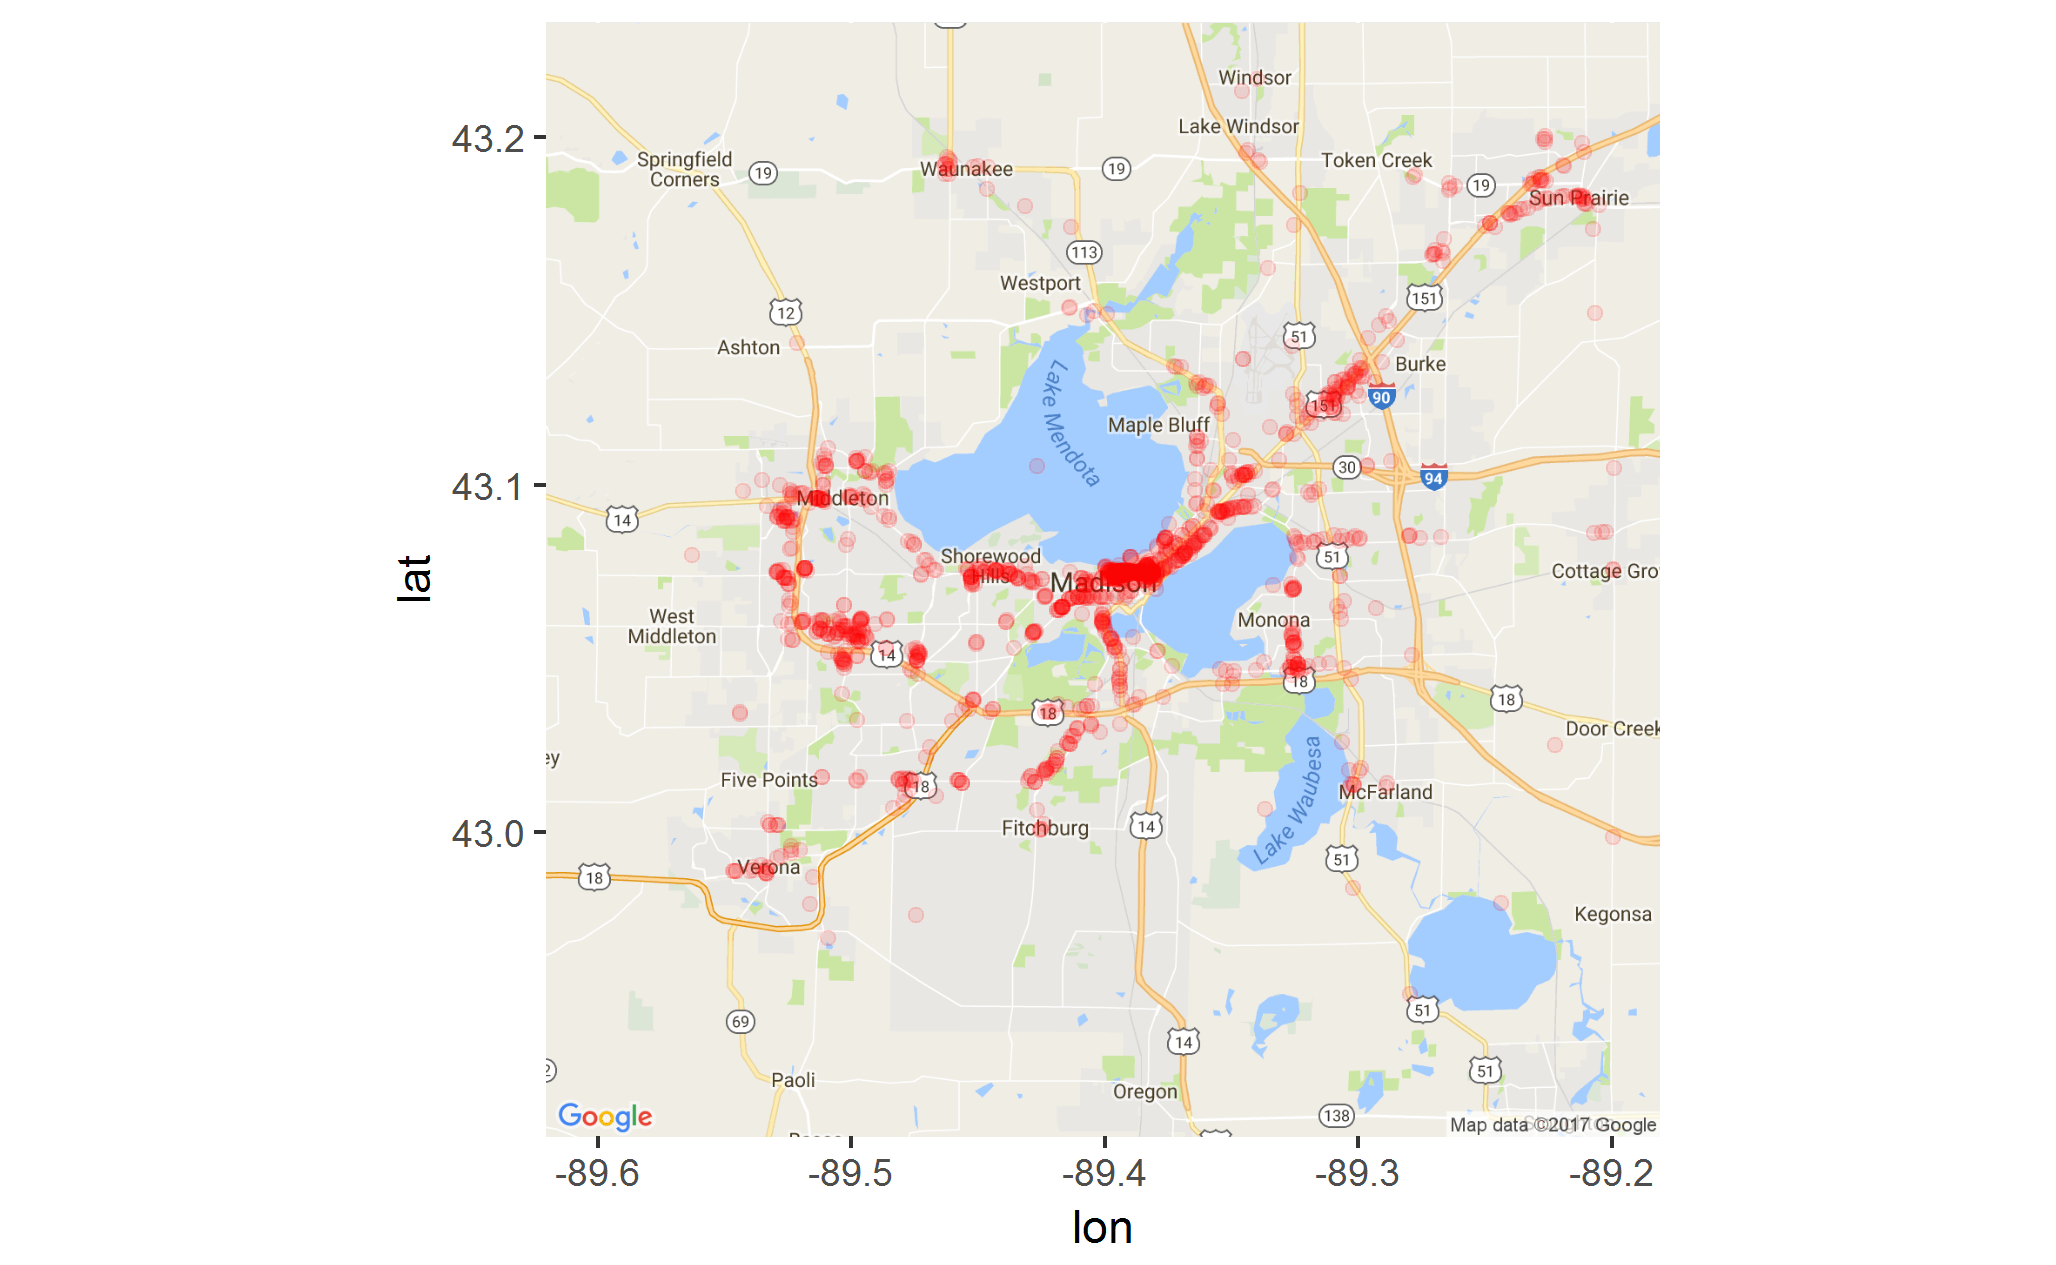

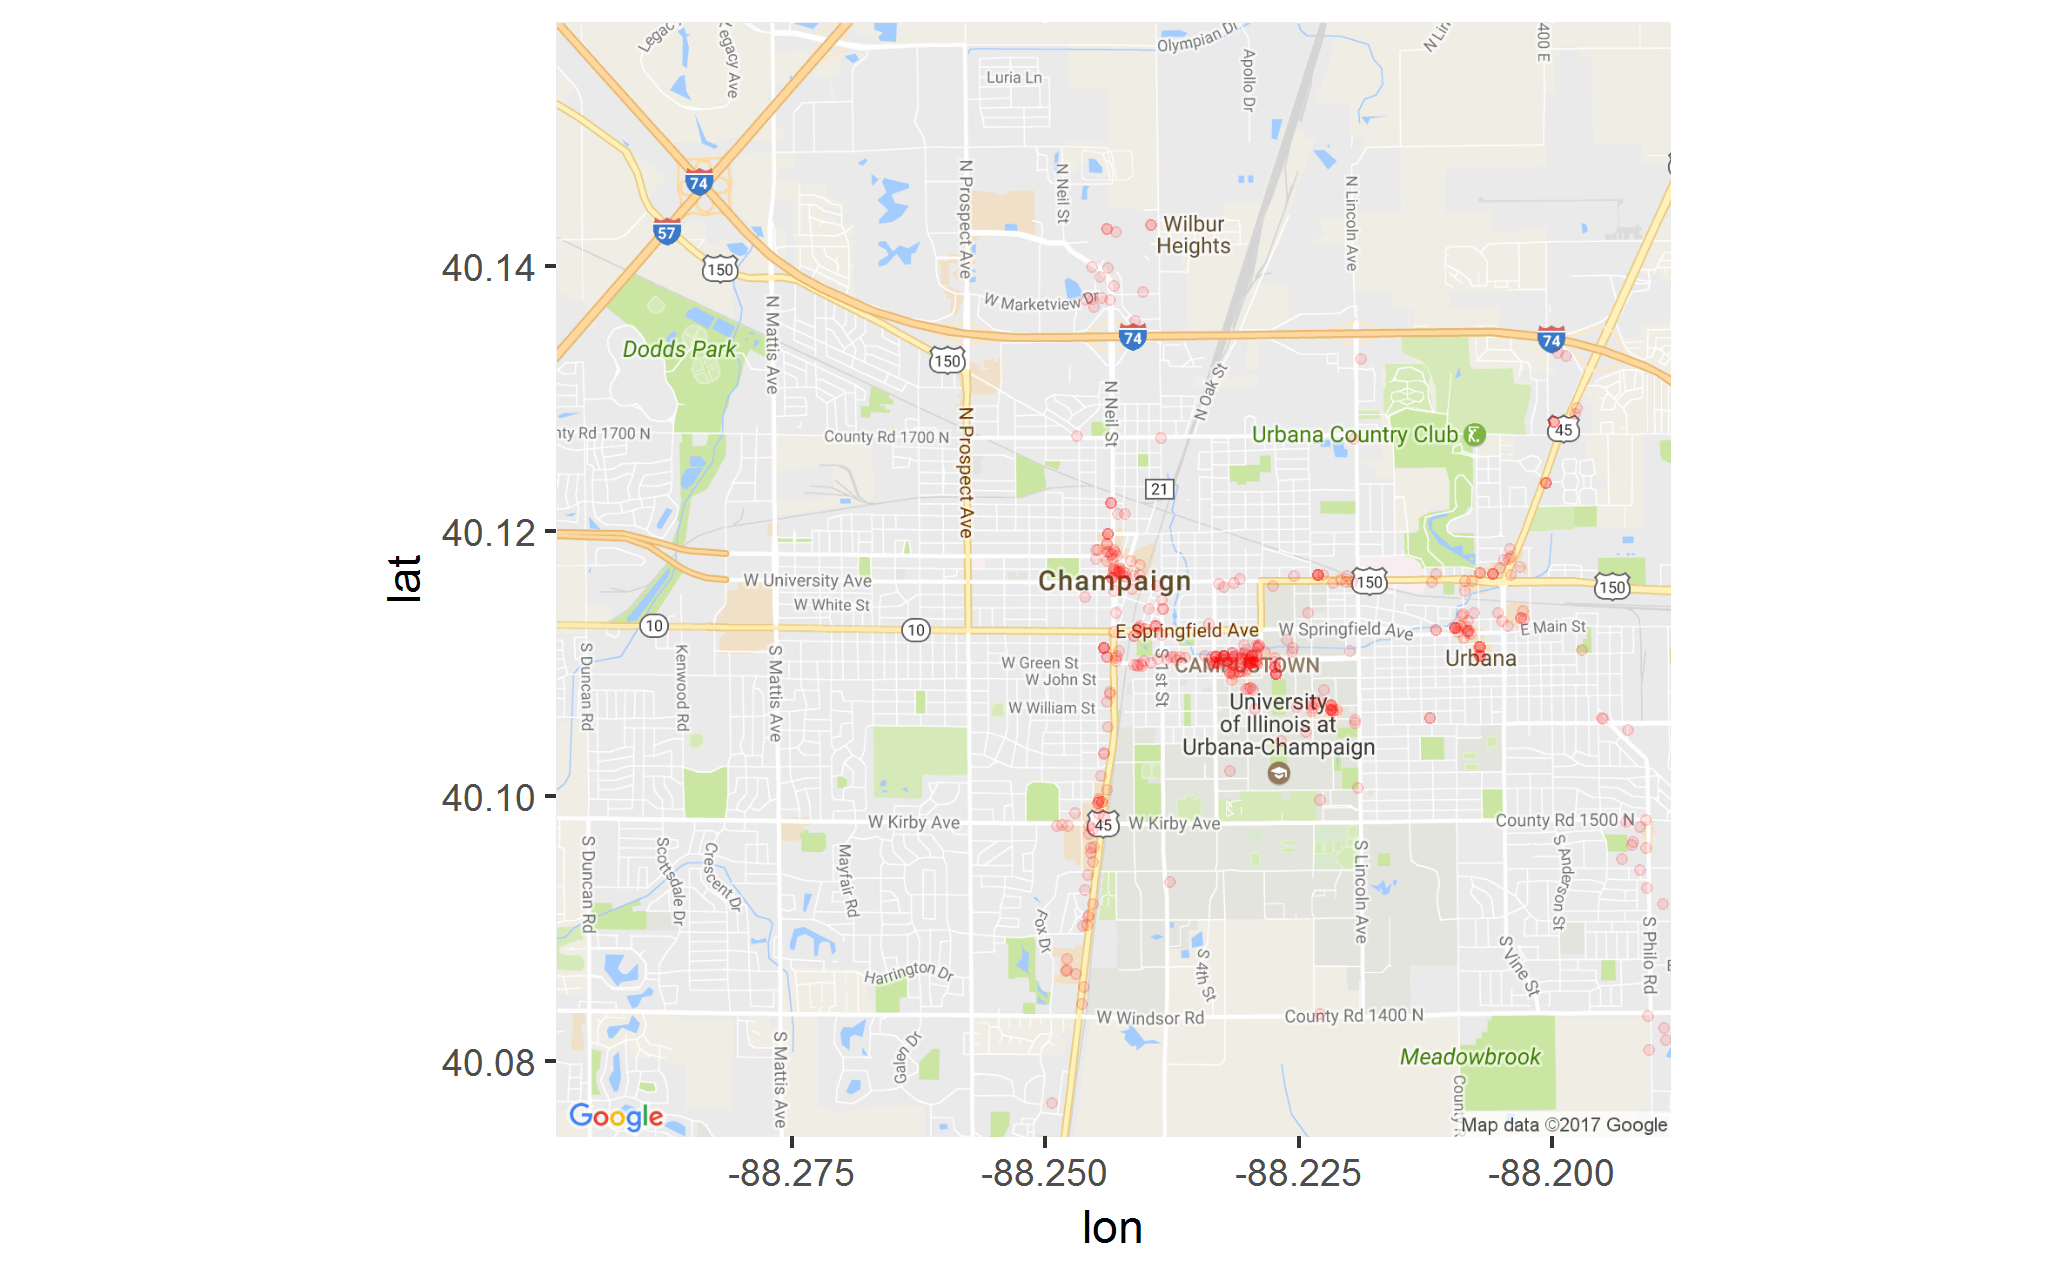

In [20]:
#data points in google maps, generated by R
from IPython.display import Image
from IPython.display import display
x1 = Image(filename='R/AZ.png') 
x2 = Image(filename='R/NV.png')
x3 = Image(filename='R/NC.png') 
x4 = Image(filename='R/PA.png')
x5 = Image(filename='R/WI.png') 
x6 = Image(filename='R/IL.png')
display(x1,x2,x3,x4,x5,x6)

In [21]:
#Most reviewd resteraunt
Yelp_us_food[(Yelp_us_food['review_count']==5642.000000)][Key_Columns].transpose()

18835
business_id                               4bEjOyTaDG24SY5TxsaUNQ
categories     ['Breakfast & Brunch', 'Steakhouses', 'French'...
name                                                Mon Ami Gabi
review_count                                                5642
state                                                         NV
full_address   3655 Las Vegas Blvd S\nThe Strip\nLas Vegas, N...
open                                                        True
city                                                   Las Vegas
stars                                                          4
type                                                    business
latitude                                                  36.113
longitude                                               -115.173
neighborhoods                                      ['The Strip']

In [22]:
start_time=time.time()
Yelp_us_food_id_list=','.join(Yelp_us_food['business_id'])
def review_in_us_food(biz_id):
    if biz_id in Yelp_us_food_id_list:
        return True
    else:
        return False

Yelp_review=pd.read_csv(work_dir+'yelp_academic_dataset_review.csv')
Yelp_us_food_review=Yelp_review[Yelp_review['business_id'].apply(review_in_us_food)]

end_time=time.time()
print "%s seconds" % (end_time-start_time)

263.822999954 seconds


In [23]:
Yelp_us_food_review.count()

user_id         1428256
review_id       1428256
text            1428256
votes.cool      1428256
business_id     1428256
votes.funny     1428256
stars           1428256
date            1428256
type            1428256
votes.useful    1428256
dtype: int64

### 2.5 Add the state information into reviews datasets

In [28]:
Yelp_us_food_review_preprocessed=pd.read_csv('Data\Yelp_us_food_review_preprocessed.csv')

C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
biz_state=Yelp_us_food[['business_id','state']]

Yelp_us_food_review_w_state=pd.merge(Yelp_us_food_review_preprocessed, biz_state, on='business_id')

### 2.6 Save the file

In [ ]:
Yelp_us_food.to_csv('Data\Yelp_us_food.csv',index=False)
print len(Yelp_us_food), ' business totally'

In [30]:
Yelp_us_food_review_w_state.to_csv('Data\Yelp_us_food_review_preprocessed.csv',index=False)
print len(Yelp_us_food_review), ' review totally'

1428256  review totally


### 2.6 Regional Segmentation